Typical DS packages

In [477]:
import warnings 
warnings.filterwarnings('ignore')

In [478]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib.colors import to_rgba

from sklearn import datasets

from tqdm import tqdm

In [479]:
pip install -r requirements.txt

  Cloning https://github.com/EgorDudyrev/caspailleur.git to /private/var/folders/ym/ymvbx_ts67n0ln90hj1qmz8h0000gn/T/pip-install-nmdd6h_k/caspailleur_3f3cc0e62e5a41aca76d56e6aa53159a
  Running command git clone --filter=blob:none --quiet https://github.com/EgorDudyrev/caspailleur.git /private/var/folders/ym/ymvbx_ts67n0ln90hj1qmz8h0000gn/T/pip-install-nmdd6h_k/caspailleur_3f3cc0e62e5a41aca76d56e6aa53159a
  Resolved https://github.com/EgorDudyrev/caspailleur.git to commit b65df09edaef0767c8d5a5aa97a9efe809c7d24a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/EgorDudyrev/paspailleur.git (to revision feature/pattern_keys) to /private/var/folders/ym/ymvbx_ts67n0ln90hj1qmz8h0000gn/T/pip-install-nmdd6h_k/paspailleur_a45f1a56b4804cffb8f1b9f7b4b70980
  Running command git clone --filter=blob:none --quiet https://github.com/EgorDudyrev/paspailleur.git /private/var/folders/ym/ymvb

FCA packages

In [480]:
import caspailleur as csp
from paspailleur import pattern_structures as PS

Bitarrays that make operations on extent really fast

# Clustering Step 1. Get the data

In [481]:
from bitarray.util import subset as ba_subset
from bitarray import frozenbitarray

Copy-pasting the code from https://scikit-learn.org/stable/modules/clustering.html

## noisy circles

In [482]:
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
seed = 30
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
)
X, y = noisy_circles

## noisy moons

In [504]:
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
seed = 30
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)

X, y = noisy_moons

## blobs

In [522]:
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
seed = 30
blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)

X, y = blobs

## varied

In [540]:
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
seed = 30
random_state = 170
varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=170)

X, y = varied

## no_structure

In [555]:
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
seed = 30
random_state = 170
rng = np.random.RandomState(seed)
no_structure = rng.rand(n_samples, 2), None

X, y = no_structure

## aniso

In [570]:
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
seed = 30
random_state = 170




X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)


X, y = aniso

In [27]:
import visual_lib as vlib

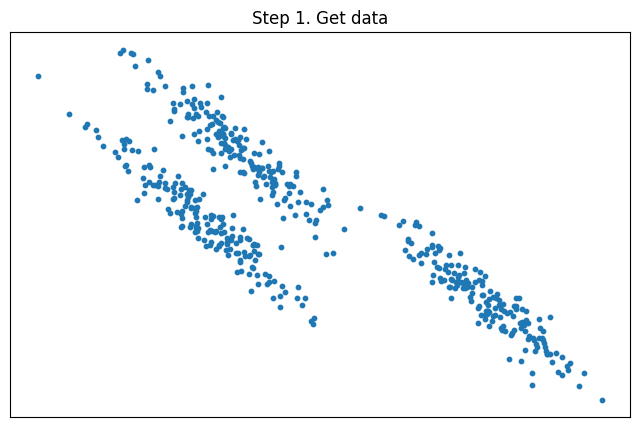

In [571]:
fig, ax = plt.subplots(figsize=(8, 5))

vlib.init_axis(ax, 'Step 1. Get data', [], [])
ax.scatter(X[:,0], X[:,1], s=10)

fig.savefig('pipe_step1_circlesdata.pdf')
plt.show()

In [572]:
MIN_SUPPORT = 0.05
MIN_STABILITY = 0.01
PRECISION = 6

In [573]:
borders_per_axis = [np.linspace(X[:,j].min(), X[:,j].max(), 11) for j in range(X.shape[1])]
borders_per_axis

[array([-5.70080235, -4.85868142, -4.0165605 , -3.17443957, -2.33231865,
        -1.49019772, -0.6480768 ,  0.19404412,  1.03616505,  1.87828597,
         2.7204069 ]),
 array([-3.15018913, -2.32532734, -1.50046555, -0.67560375,  0.14925804,
         0.97411983,  1.79898162,  2.62384341,  3.4487052 ,  4.27356699,
         5.09842878])]

In [574]:
basic_pss = [PS.IntervalPS(values=borders, ndigits=PRECISION) for borders in borders_per_axis]
ps_cart = PS.CartesianPS(basic_pss)
#data = list(ps_cart.preprocess_data(X))

In [575]:
import clustering_new_7

In [576]:
from clustering_new_7 import run_clustering

In [577]:
import time

In [578]:
t0 = time.time()
concepts_df, best_clustering, clusters_df, best_log, top_log = run_clustering(X, ps_cart, thrift_factor = 4, clustering_params=None)
t1 = time.time()

Compute intents: 100%|██████████████████████| 404/404 [00:00<00:00, 2200.43it/s]


In [579]:
clusters_df

,extent,intent,delta_stability,support,frequency,intent_human,level
8,"[1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, ...","((-3.17444, 2.720407, (BoundStatus.RCLOSED, Bo...",7,374,0.748,"x0: [-3.17, 2.72], x1: [-∞, 4.27]",1
253,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...","((-4.858681, -3.17444, (BoundStatus.RCLOSED, B...",9,122,0.244,"x0: [-4.86, -3.17], x1: [0.15, 5.10]",1


In [580]:
best_log

,coverage,overlap,n_concepts,balance,stability,complexity
Added concept idx,,,,,,
ø,0.000,0.0,0.0,0.000000,0.000,0.0
8,0.748,0.0,0.1,0.000000,0.014,0.5
253,0.992,0.0,0.2,0.356382,0.016,0.5


In [581]:
top_log

,coverage,overlap,n_concepts,balance,stability,complexity
clustering,,,,,,
"(8, 253)",0.992,0.000000,0.2,0.356382,0.016000,0.500000
"(2, 271)",0.990,0.000000,0.2,0.405879,0.018000,0.750000
"(5, 271, 383)",0.990,0.020000,0.3,0.364379,0.018000,0.666667
"(2, 283)",0.972,0.000000,0.2,0.418607,0.021000,0.750000
"(2, 302, 396)",0.986,0.006667,0.3,0.390576,0.030667,0.833333


## GRAPHS

## For 3 concepts

In [564]:
extents = {
'0': clusters_df['extent'][0],
'1': clusters_df['extent'][1343],
'2': clusters_df['extent'][1685],
    
}

In [565]:
object_clusters = {
'0': clusters_df['extent'][0].search(True),
'1': clusters_df['extent'][1343].search(True),
'2': clusters_df['extent'][1685].search(True)
}

In [566]:
obj_belongs = np.array([0]*500)
for i in range(0, 500): 
    if(i in object_clusters['0']) and (i not in object_clusters['1']) and (i not in object_clusters['2']):
        obj_belongs[i] = 0
        
    elif (i in object_clusters['1']) and (i not in object_clusters['0']) and (i not in object_clusters['2']):
        obj_belongs[i] = 1        
    elif (i in object_clusters['2']) and (i not in object_clusters['0']) and (i not in object_clusters['1']):
        obj_belongs[i] = 2
    elif  (i not in object_clusters['2']) and (i not in object_clusters['0']) and (i not in object_clusters['1']):
        obj_belongs[i] = -1
    else:
        obj_belongs[i] = 6

## For 2 concepts

In [582]:
extents = {
'0': clusters_df['extent'][8],
'1': clusters_df['extent'][253],
    
}

In [583]:
object_clusters = {
'0': clusters_df['extent'][8].search(True),
'1': clusters_df['extent'][253].search(True),
}

In [584]:
obj_belongs = np.array([0]*500)
for i in range(0, 500): 
    if(i in object_clusters['0']) and (i not in object_clusters['1']):
        obj_belongs[i] = 0
        
    elif (i in object_clusters['1']) and (i not in object_clusters['0']):
        obj_belongs[i] = 1        

    elif (i in object_clusters['1']) and (i in object_clusters['0']):
        obj_belongs[i] = 6  
    
    else:
        obj_belongs[i] = -1

In [497]:
t0_d = dict()
t1_d = dict()
obj_belonging  = dict()

In [498]:
reward_weights = dict(
    overlap_weight=0.5, n_concepts_weight=0.0, balance_weight=0.2,
    stability_weight=0.1, complexity_weight=0.1,

)

## sim_circles

In [499]:
from clustering_new_7 import clustering_reward2

In [500]:
thrift_factor = 4

In [501]:
pairs_fca_circles = set()
for i in range(0, 500):
    for j in range(i+1,500):
        if obj_belongs[i] == obj_belongs[j]:
            pairs_fca_circles.add((i,j))

In [502]:
obj_belonging['circles'] = obj_belongs.copy()
t0_d['circles'] = t0
t1_d['circles'] = t1
t_circ = t1-t0
reward_circ, reward_details_circ = clustering_reward2(best_clustering, concepts_df, **reward_weights)

## sim_moons

In [519]:
pairs_fca_moons = set()
for i in range(0, 500):
    for j in range(i+1,500):
        if obj_belongs[i] == obj_belongs[j]:
            pairs_fca_moons.add((i,j))

In [520]:
obj_belonging['moons'] = obj_belongs.copy()
t0_d['moons'] = t0
t1_d['moons'] = t1
t_moons = t1-t0
reward_moons, reward_details_moons = clustering_reward2(best_clustering, concepts_df, **reward_weights)

## sim_blobs

In [537]:
pairs_fca_blobs = set()
for i in range(0, 500):
    for j in range(i+1,500):
        if obj_belongs[i] == obj_belongs[j]:
            pairs_fca_blobs.add((i,j))

In [538]:
obj_belonging['blobs'] = obj_belongs.copy()
t0_d['blobs'] = t0
t1_d['blobs'] = t1
t_blobs = t1-t0
reward_blobs, reward_details_blobs = clustering_reward2(best_clustering, concepts_df, **reward_weights)

## sim_var

In [552]:
pairs_fca_var = set()
for i in range(0, 500):
    for j in range(i+1,500):
        if obj_belongs[i] == obj_belongs[j]:
            pairs_fca_var.add((i,j))

In [553]:
obj_belonging['varied'] = obj_belongs.copy()
t0_d['varied'] = t0
t1_d['varied'] = t1
t_var = t1-t0
reward_var, reward_details_var = clustering_reward2(best_clustering, concepts_df, **reward_weights)

## sim_no_str

In [567]:
pairs_fca_no_str = set()
for i in range(0, 500):
    for j in range(i+1,500):
        if obj_belongs[i] == obj_belongs[j]:
            pairs_fca_no_str.add((i,j))

In [568]:
obj_belonging['no_structure'] = obj_belongs.copy()
t0_d['no_structure'] = t0
t1_d['no_structure'] = t1
t_nos = t1-t0
reward_nos, reward_details_nos = clustering_reward2(best_clustering, concepts_df, **reward_weights)

## sim_aniso

In [585]:
pairs_fca_aniso = set()
for i in range(0, 500):
    for j in range(i+1,500):
        if obj_belongs[i] == obj_belongs[j]:
            pairs_fca_aniso.add((i,j))

In [586]:
obj_belonging['aniso'] = obj_belongs.copy()
t0_d['aniso'] = t0
t1_d['aniso'] = t1
t_aniso = t1-t0
reward_aniso, reward_details_circ_aniso = clustering_reward2(best_clustering, concepts_df, **reward_weights)

## Draw

In [48]:
from itertools import cycle, islice

## Noisy Circles

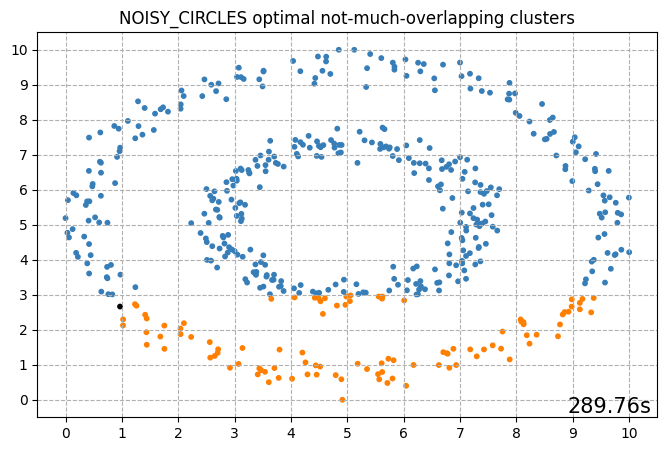

In [503]:
fig, ax = plt.subplots(figsize=(8, 5))
vlib.init_axis(ax, f"NOISY_CIRCLES optimal not-much-overlapping clusters", borders_per_axis[0], borders_per_axis[1], range(len(borders_per_axis[0])), range(len(borders_per_axis[1])), grid_params=dict(zorder=0, linestyle='--'))

colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(obj_belongs) + 1),
                )
            )
)
colors = np.append(colors, ["#000000"])
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[obj_belongs])

plt.text(0.99,0.01, ("%.2fs" % (t1 - t0)).lstrip("0"), transform=plt.gca().transAxes, size=15, horizontalalignment="right",)
fig.savefig('noisy_circles.pdf')
plt.show()

### percent pairs

## Noisy Moons

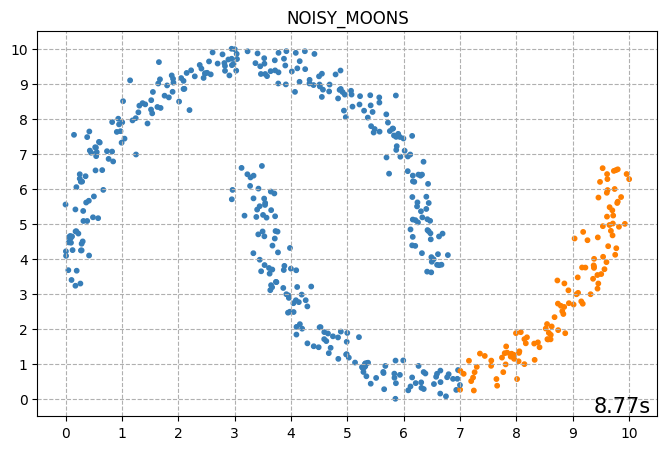

In [521]:
fig, ax = plt.subplots(figsize=(8, 5))
vlib.init_axis(ax, f"NOISY_MOONS", borders_per_axis[0], borders_per_axis[1], range(len(borders_per_axis[0])), range(len(borders_per_axis[1])), grid_params=dict(zorder=0, linestyle='--'))

colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(obj_belongs) + 1),
                )
            )
)
colors = np.append(colors, ["#000000"])
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[obj_belongs])

plt.text(0.99,0.01, ("%.2fs" % (t1 - t0)).lstrip("0"), transform=plt.gca().transAxes, size=15, horizontalalignment="right",)
fig.savefig('noisy_moons.pdf')
plt.show()

### percent

## blobs

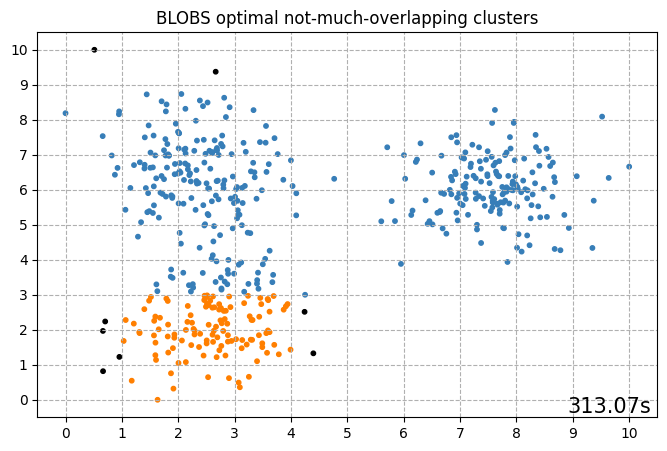

In [539]:
fig, ax = plt.subplots(figsize=(8, 5))
vlib.init_axis(ax, f"BLOBS optimal not-much-overlapping clusters", borders_per_axis[0], borders_per_axis[1], range(len(borders_per_axis[0])), range(len(borders_per_axis[1])), grid_params=dict(zorder=0, linestyle='--'))

colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(obj_belongs) + 1),
                )
            )
)
colors = np.append(colors, ["#000000"])
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[obj_belongs])

plt.text(0.99,0.01, ("%.2fs" % (t1 - t0)).lstrip("0"), transform=plt.gca().transAxes, size=15, horizontalalignment="right",)
fig.savefig('blobs.pdf')
plt.show()

### percent

## varied

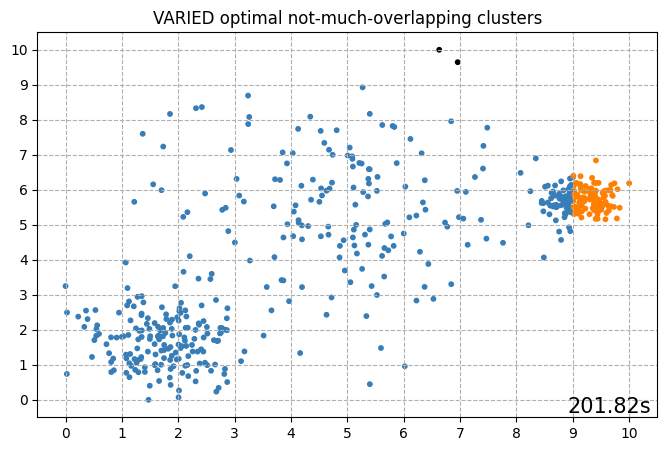

In [554]:
fig, ax = plt.subplots(figsize=(8, 5))
vlib.init_axis(ax, f"VARIED optimal not-much-overlapping clusters", borders_per_axis[0], borders_per_axis[1], range(len(borders_per_axis[0])), range(len(borders_per_axis[1])), grid_params=dict(zorder=0, linestyle='--'))

colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(obj_belongs) + 1),
                )
            )
)
colors = np.append(colors, ["#000000"])
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[obj_belongs])

plt.text(0.99,0.01, ("%.2fs" % (t1 - t0)).lstrip("0"), transform=plt.gca().transAxes, size=15, horizontalalignment="right",)
fig.savefig('varied.pdf')
plt.show()

### percent

## no_structure

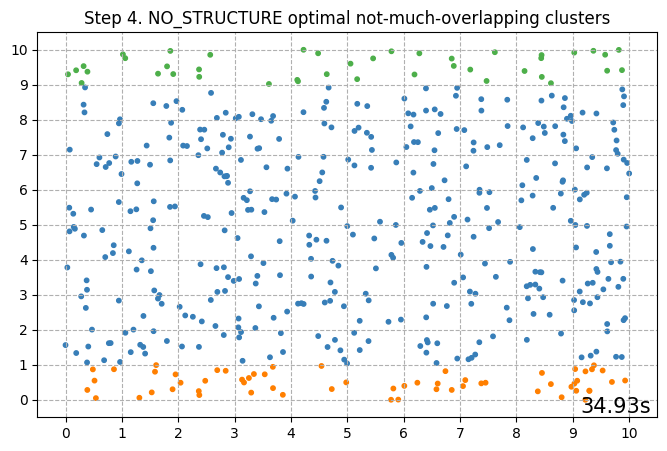

In [569]:
fig, ax = plt.subplots(figsize=(8, 5))
vlib.init_axis(ax, f"Step 4. NO_STRUCTURE optimal not-much-overlapping clusters", borders_per_axis[0], borders_per_axis[1], range(len(borders_per_axis[0])), range(len(borders_per_axis[1])), grid_params=dict(zorder=0, linestyle='--'))

colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(obj_belongs) + 1),
                )
            )
)
colors = np.append(colors, ["#000000"])
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[obj_belongs])

plt.text(0.99,0.01, ("%.2fs" % (t1 - t0)).lstrip("0"), transform=plt.gca().transAxes, size=15, horizontalalignment="right",)
fig.savefig('no_structure.pdf')
plt.show()

### percent

## aniso

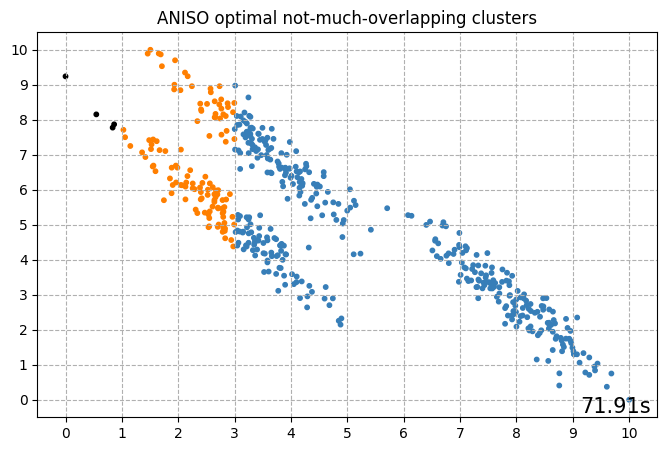

In [587]:
fig, ax = plt.subplots(figsize=(8, 5))
vlib.init_axis(ax, f"ANISO optimal not-much-overlapping clusters", borders_per_axis[0], borders_per_axis[1], range(len(borders_per_axis[0])), range(len(borders_per_axis[1])), grid_params=dict(zorder=0, linestyle='--'))

colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(obj_belongs) + 1),
                )
            )
)
colors = np.append(colors, ["#000000"])
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[obj_belongs])

plt.text(0.99,0.01, ("%.2fs" % (t1 - t0)).lstrip("0"), transform=plt.gca().transAxes, size=15, horizontalalignment="right",)
fig.savefig('aniso.pdf')
plt.show()

### percent

## End of smart_version

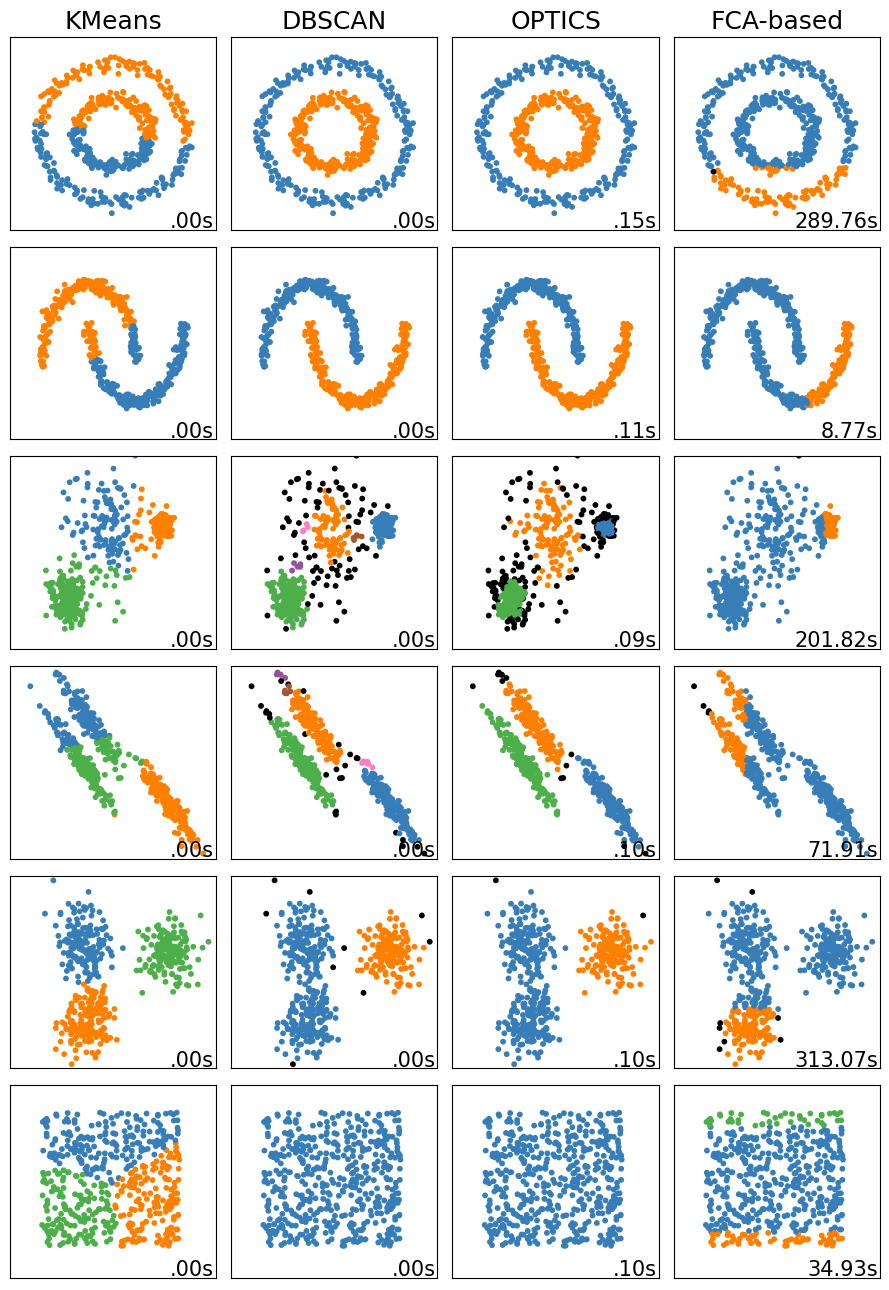

In [588]:
import time
import warnings
from itertools import cycle, islice

import matplotlib.pyplot as plt
import numpy as np

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
seed = 30
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)
rng = np.random.RandomState(seed)
no_structure = rng.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(2 * 3 + 3, 13))
plt.box(False)
plt.subplots_adjust(
    left=0.0, right=1, bottom=0, top=1, wspace=0, hspace=0
)
#plt.subplots_adjust(bottom=bottom_pos, top=top_pos, left=left_pos, right=right_pos)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 3,
    "n_clusters": 3,
    "min_samples": 7,
    "xi": 0.05,
    "min_cluster_size": 0.1,
    "allow_single_cluster": True,
    "hdbscan_min_cluster_size": 15,
    "hdbscan_min_samples": 3,
    "random_state": 42,
}
ds = ['circles', 'moons',  'varied', 'aniso', 'blobs', 'no_structure' ]
datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.08,
        },
    ),
    (
        noisy_moons,
        {
            "damping": 0.75,
            "preference": -220,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.1,
        },
    ),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.01,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {"min_samples": 7, "xi": 0.1, "min_cluster_size": 0.2}),
    (no_structure, {}),
]
k_enumerator = -1
for i_dataset, (dataset, algo_params) in enumerate(datasets):
    k_enumerator += 1
    
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============

    
    #ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    k_means = cluster.KMeans(
        n_clusters=params["n_clusters"],
        random_state=params["random_state"],
    )
    fca_based = obj_belonging.copy()
    

    dbscan = cluster.DBSCAN(eps=params["eps"])
    
    optics = cluster.OPTICS(
    min_samples=params["min_samples"],
    xi=params["xi"],
    min_cluster_size=params["min_cluster_size"],
    )

   

    clustering_algorithms = (
        ("KMeans", k_means),

        ("DBSCAN", dbscan),
        ("OPTICS", optics),
        ("FCA-based", fca_based),
    )

    for name, algorithm in clustering_algorithms:
        if name != "FCA-based": 
            
            t0 = time.time()

            # catch warnings related to kneighbors_graph
            with warnings.catch_warnings():
                warnings.filterwarnings(
                    "ignore",
                    message="the number of connected components of the "
                    + "connectivity matrix is [0-9]{1,2}"
                    + " > 1. Completing it to avoid stopping the tree early.",
                    category=UserWarning,
                )
                warnings.filterwarnings(
                    "ignore",
                    message="Graph is not fully connected, spectral embedding"
                    + " may not work as expected.",
                    category=UserWarning,
                )
                algorithm.fit(X)

            t1 = time.time()
            if hasattr(algorithm, "labels_"):
                y_pred = algorithm.labels_.astype(int)
            else:
                y_pred = algorithm.predict(X)
        else:
            t0 = t0_d[ds[k_enumerator]]
            t1 = t1_d[ds[k_enumerator]]
            y_pred  = obj_belonging[ds[k_enumerator]].copy()

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        #plt.box(False)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        fig.patch.set_visible(False)
        ax.axis('off')
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1
plt.tight_layout()
plt.savefig('all_algo_comparison_test_new_version_thf4.pdf', bbox_inches='tight', pad_inches = 0.05)
plt.show()


<Figure size 200x200 with 0 Axes>

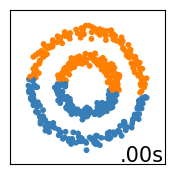

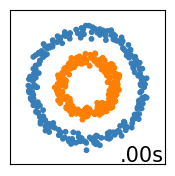

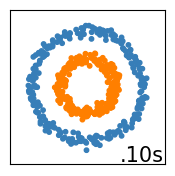

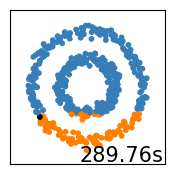

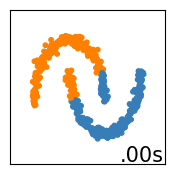

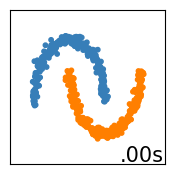

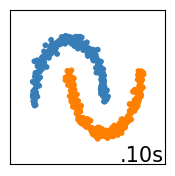

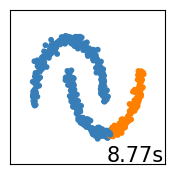

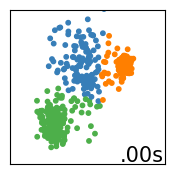

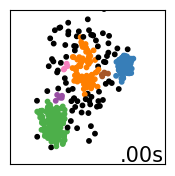

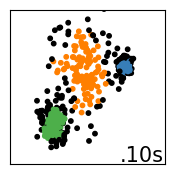

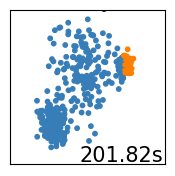

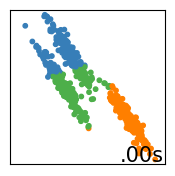

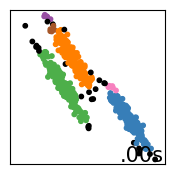

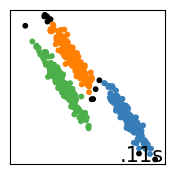

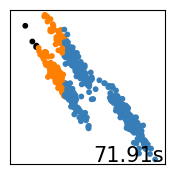

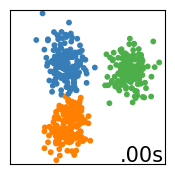

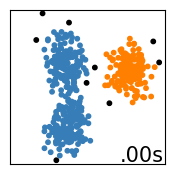

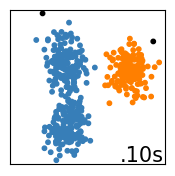

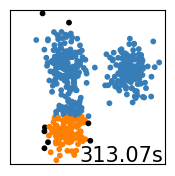

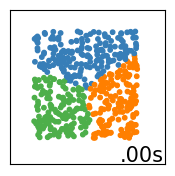

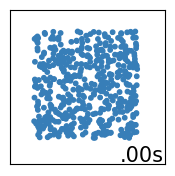

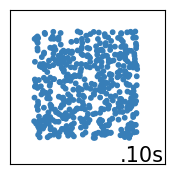

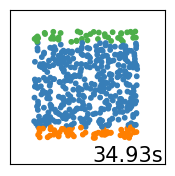

In [589]:
import time
import warnings
from itertools import cycle, islice

import matplotlib.pyplot as plt
import numpy as np

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
seed = 30
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)
rng = np.random.RandomState(seed)
no_structure = rng.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(2, 2))
# plt.subplots_adjust(
#     left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
# )

#plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 3,
    "n_clusters": 3,
    "min_samples": 7,
    "xi": 0.05,
    "min_cluster_size": 0.1,
    "allow_single_cluster": True,
    "hdbscan_min_cluster_size": 15,
    "hdbscan_min_samples": 3,
    "random_state": 42,
}
ds = ['circles', 'moons',  'varied', 'aniso', 'blobs', 'no_structure' ]
datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.08,
        },
    ),
    (
        noisy_moons,
        {
            "damping": 0.75,
            "preference": -220,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.1,
        },
    ),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.01,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {"min_samples": 7, "xi": 0.1, "min_cluster_size": 0.2}),
    (no_structure, {}),
]
compar = []
k_enumerator = -1
for i_dataset, (dataset, algo_params) in enumerate(datasets):
    k_enumerator += 1
    
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    # ds = ['circles', 'moons',  'varied', 'aniso', 'blobs', 'no_structure' ]
    # algo = ['k_means', 'dbscan', 'optis', 'fca_based' ]
    # cir      0           1         3         4
    # moons    5           6         7         8
    # varied   9           10        11         12
    # aniso    13         14         15        16
    # blobs    17         18         19        20
    # no str   21         22          23       24
   # compar = []

    
    #ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    k_means = cluster.KMeans(
        n_clusters=params["n_clusters"],
        random_state=params["random_state"],
    )
    fca_based = obj_belonging.copy()
    

    dbscan = cluster.DBSCAN(eps=params["eps"])
    
    optics = cluster.OPTICS(
    min_samples=params["min_samples"],
    xi=params["xi"],
    min_cluster_size=params["min_cluster_size"],
    )

   

    clustering_algorithms = (
        ("KMeans", k_means),

        ("DBSCAN", dbscan),
        ("OPTICS", optics),
        ("FCA-based", fca_based),
    )

    for name, algorithm in clustering_algorithms:
        
        plt.figure(figsize=(2, 2))
       # plt.box(False)
        if name != "FCA-based": 
            
            t0 = time.time()

            # catch warnings related to kneighbors_graph
            with warnings.catch_warnings():
                warnings.filterwarnings(
                    "ignore",
                    message="the number of connected components of the "
                    + "connectivity matrix is [0-9]{1,2}"
                    + " > 1. Completing it to avoid stopping the tree early.",
                    category=UserWarning,
                )
                warnings.filterwarnings(
                    "ignore",
                    message="Graph is not fully connected, spectral embedding"
                    + " may not work as expected.",
                    category=UserWarning,
                )
                algorithm.fit(X)

            t1 = time.time()
            if hasattr(algorithm, "labels_"):
                y_pred = algorithm.labels_.astype(int)
                compar.append(y_pred)
            else:
                y_pred = algorithm.predict(X)
                compar.append(y_pred)
        else:
            t0 = t0_d[ds[k_enumerator]]
            t1 = t1_d[ds[k_enumerator]]
            y_pred  = obj_belonging[ds[k_enumerator]].copy()
            compar.append(y_pred)

        #plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        #if i_dataset == 0:
        #plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        fig.patch.set_visible(False)
        ax.axis('off')
        plt.tight_layout()
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )

        # Save just the portion _inside_ the second axis's boundaries
        #extent = f.get_window_extent().transformed(f.dpi_scale_trans.inverted())
        #fig.savefig('ax'+str(name)+str(i_dataset)+'_figure.png', bbox_inches=extent)
        
        plot_num += 1
       # plt.tight_layout()
        #ax.set_frame_on(False)
        plt.savefig(str(name)+str(i_dataset)+'_figure_tf4.pdf', bbox_inches= 'tight', pad_inches = 0)
        plt.show()


## for comparison 

## K_means

### noisy_circles

In [590]:
pairs_k_means_circles = set()
for i in range(0, len(compar[0])):
    for j in range(i+1,len(compar[0])):
        if compar[0][i] == compar[0][j]:
            pairs_k_means_circles.add((i,j))

### noisy_moons

In [591]:
pairs_k_means_noisy_moons = set()
for i in range(0, len(compar[5])):
    for j in range(i+1,len(compar[5])):
        if compar[5][i] == compar[5][j]:
            pairs_k_means_noisy_moons.add((i,j))

### blobs

In [592]:
pairs_k_means_blobs = set()
for i in range(0, len(compar[17])):
    for j in range(i+1,len(compar[17])):
        if compar[17][i] == compar[17][j]:
            pairs_k_means_blobs.add((i,j))

### varied

In [593]:
pairs_k_means_varied = set()
for i in range(0, len(compar[9])):
    for j in range(i+1,len(compar[9])):
        if compar[9][i] == compar[9][j]:
            pairs_k_means_varied.add((i,j))

### no_structure

In [594]:
pairs_k_means_no_structure = set()
for i in range(0, len(compar[21])):
    for j in range(i+1,len(compar[21])):
        if compar[21][i] == compar[21][j]:
            pairs_k_means_no_structure.add((i,j))

### aniso

In [595]:
pairs_k_means_aniso = set()
for i in range(0, len(compar[13])):
    for j in range(i+1,len(compar[13])):
        if compar[13][i] == compar[13][j]:
            pairs_k_means_aniso.add((i,j))

## DBSCAN

### noisy_circles

In [596]:
pairs_db_circles = set()
for i in range(0, len(compar[1])):
    for j in range(i+1,len(compar[1])):
        if compar[1][i] == compar[1][j]:
            pairs_db_circles.add((i,j))

### noisy_moons

In [597]:
pairs_db_noisy_moons = set()
for i in range(0, len(compar[6])):
    for j in range(i+1,len(compar[6])):
        if compar[6][i] == compar[6][j]:
            pairs_db_noisy_moons.add((i,j))

### blobs

In [598]:
pairs_db_blobs = set()
for i in range(0, len(compar[18])):
    for j in range(i+1,len(compar[18])):
        if compar[18][i] == compar[18][j]:
            pairs_db_blobs.add((i,j))

### varied

In [599]:
pairs_db_varied = set()
for i in range(0, len(compar[10])):
    for j in range(i+1,len(compar[10])):
        if compar[10][i] == compar[10][j]:
            pairs_db_varied.add((i,j))

### no_structure

In [600]:
pairs_db_no_structure = set()
for i in range(0, len(compar[22])):
    for j in range(i+1,len(compar[22])):
        if compar[22][i] == compar[22][j]:
            pairs_db_no_structure.add((i,j))

### aniso

In [601]:
pairs_db_aniso = set()
for i in range(0, len(compar[14])):
    for j in range(i+1,len(compar[14])):
        if compar[14][i] == compar[14][j]:
            pairs_db_aniso.add((i,j))

# OPTICS

### noisy_circles

In [602]:
pairs_db_varied = set()
for i in range(0, len(compar[3])):
    for j in range(i+1,len(compar[3])):
        if compar[3][i] == compar[3][j]:
            pairs_db_varied.add((i,j))

### noisy_moons

In [603]:
pairs_db_varied = set()
for i in range(0, len(compar[7])):
    for j in range(i+1,len(compar[7])):
        if compar[7][i] == compar[7][j]:
            pairs_db_varied.add((i,j))

### blobs

In [604]:
pairs_db_varied = set()
for i in range(0, len(compar[19])):
    for j in range(i+1,len(compar[19])):
        if compar[19][i] == compar[19][j]:
            pairs_db_varied.add((i,j))

### varied

In [605]:
pairs_db_varied = set()
for i in range(0, len(compar[11])):
    for j in range(i+1,len(compar[11])):
        if compar[11][i] == compar[11][j]:
            pairs_db_varied.add((i,j))

### no_structure

In [606]:
pairs_db_varied = set()
for i in range(0, len(compar[23])):
    for j in range(i+1,len(compar[23])):
        if compar[23][i] == compar[23][j]:
            pairs_db_varied.add((i,j))

### aniso

In [607]:
pairs_db_varied = set()
for i in range(0, len(compar[15])):
    for j in range(i+1,len(compar[15])):
        if compar[15][i] == compar[15][j]:
            pairs_db_varied.add((i,j))

# Similarity 

In [274]:
#pairs_fca_circles

In [277]:
#pairs_k_means_circles

In [279]:
#pairs_db_circles

In [281]:
#pairs_fca_moons

In [285]:
#pairs_k_means_noisy_moons

In [288]:
#pairs_db_noisy_moons

In [290]:
#pairs_fca_blobs

In [293]:
#pairs_k_means_blobs

In [295]:
#pairs_db_blobs

In [298]:
#pairs_fca_var

In [300]:
#pairs_k_means_varied

In [302]:
#pairs_db_varied

In [305]:
#pairs_fca_no_str

In [307]:
#pairs_k_means_no_structure

In [309]:
#pairs_db_no_structure

In [311]:
#pairs_fca_aniso

In [313]:
#pairs_k_means_aniso

In [315]:
#pairs_db_aniso

## noisy_circles

### k-means

In [608]:
k_means_circle = len(pairs_fca_circles & pairs_k_means_circles)/(500*500)*2
k_means_circle

0.37488

### dbscan

In [609]:
k_db_circle = len(pairs_fca_circles & pairs_db_circles)/(500*500)*2
k_db_circle 

0.352176

## noisy_moons

### k-means

In [610]:
k_means_moons = len(pairs_fca_moons & pairs_k_means_noisy_moons )/(500*500)*2
k_means_moons

0.373968

### dbscan

In [611]:
db_moons = len(pairs_fca_moons & pairs_db_noisy_moons )/(500*500)*2
db_moons 

0.373968

## blobs

### k-means

In [612]:
k_means_blobs = len(pairs_fca_blobs & pairs_k_means_blobs )/(500*500)*2
k_means_blobs 

0.326744

### dbscan

In [613]:
db_blobs = len(pairs_fca_blobs & pairs_db_blobs)/(500*500)*2
db_blobs

0.335144

## varied

### k-means

In [614]:
k_means_var = len(pairs_fca_var & pairs_k_means_varied)/(500*500)*2
k_means_var 

0.211104

### dbscan

In [615]:
db_var = len(pairs_fca_var & pairs_db_varied)/(500*500)*2
db_var

0.386872

## no_structure

### k-means

In [616]:
k_means_no_str = len(pairs_fca_no_str &pairs_k_means_no_structure)/(500*500)*2
k_means_no_str

0.653072

### dbscan

In [617]:
db_no_str = len(pairs_fca_no_str & pairs_db_no_structure)/(500*500)*2
db_no_str 

0.653072

## aniso

### k-means

In [618]:
k_means_aniso = len(pairs_fca_aniso & pairs_k_means_aniso)/(500*500)*2
k_means_aniso

0.20316

### dbscan

In [619]:
db_aniso = len(pairs_fca_aniso & pairs_db_aniso)/(500*500)*2
db_aniso

0.224616

In [620]:
circles2 = {'dataset': 'noisy_circles', 'thrift_factor': thrift_factor, 't_av': t_circ, 'reward': k_db_circle}
moons2 = {'dataset': 'noisy_moons',  'thrift_factor':thrift_factor, 't_av':t_moons, 'reward':db_moons }
blobs2 = {'dataset': 'blobs',  'thrift_factor':thrift_factor, 't_av':t_blobs , 'reward':db_blobs}
varied2 = {'dataset': 'varied',  'thrift_factor':thrift_factor, 't_av' :t_var , 'reward':db_var}
no_structure2 = {'dataset': 'no_structure',  'thrift_factor':thrift_factor, 't_av': t_nos, 'reward':db_no_str }
aniso2 = {'dataset': 'aniso',  'thrift_factor': thrift_factor, 't_av':t_aniso, 'reward':db_aniso}

In [162]:
df_2 = pd.DataFrame(columns = ['dataset','thrift_factor','t_av', 'reward'])
df_2

,dataset,thrift_factor,t_av,reward


In [621]:
df_2 = df_2._append(circles2, ignore_index = True)
df_2 = df_2._append(moons2, ignore_index = True)
df_2 = df_2._append(blobs2, ignore_index = True)
df_2 = df_2._append(varied2, ignore_index = True)
df_2 = df_2._append(no_structure2, ignore_index = True)
df_2 = df_2._append(aniso2, ignore_index = True)
df_2 

,dataset,thrift_factor,t_av,reward
0,noisy_circles,1,1.792555,0.335944
1,noisy_moons,1,1.029987,0.373968
2,blobs,1,0.777845,0.360744
3,varied,1,0.859398,0.386040
4,no_structure,1,2.130644,0.653072
5,aniso,1,0.531728,0.246136
6,noisy_circles,2,2.143283,0.352176
7,noisy_moons,2,1.208125,0.373968
8,blobs,2,0.840650,0.360672
9,varied,2,1.094744,0.386040


In [164]:
df = pd.DataFrame(columns = ['dataset', 'thrift_factor', 'K_means', 'DBSCAN'])
df

,dataset,thrift_factor,K_means,DBSCAN


In [622]:
circles = {'dataset': 'noisy_circles', 'thrift_factor':thrift_factor, 'K_means': k_means_circle, 'DBSCAN': k_db_circle}
moons = {'dataset': 'noisy_moons', 'thrift_factor':thrift_factor,  'K_means':k_means_moons, 'DBSCAN':db_moons }
blobs = {'dataset': 'blobs', 'thrift_factor':thrift_factor,  'K_means':k_means_blobs , 'DBSCAN':db_blobs}
varied = {'dataset': 'varied', 'thrift_factor':thrift_factor,  'K_means' :k_means_var , 'DBSCAN':db_var}
no_structure = {'dataset': 'no_structure','thrift_factor':thrift_factor,   'K_means': k_means_no_str, 'DBSCAN':db_no_str }
aniso = {'dataset': 'aniso', 'thrift_factor':thrift_factor,  'K_means':k_means_aniso, 'DBSCAN':db_aniso}


In [623]:
df = df._append(circles, ignore_index = True)
df = df._append(moons, ignore_index = True)
df = df._append(blobs, ignore_index = True)
df = df._append(varied, ignore_index = True)
df = df._append(no_structure, ignore_index = True)
df = df._append(aniso, ignore_index = True)

In [624]:
df

,dataset,thrift_factor,K_means,DBSCAN
0,noisy_circles,1,0.307640,0.335944
1,noisy_moons,1,0.373968,0.373968
2,blobs,1,0.355112,0.360744
3,varied,1,0.213320,0.386040
4,no_structure,1,0.653072,0.653072
5,aniso,1,0.222520,0.246136
6,noisy_circles,2,0.374880,0.352176
7,noisy_moons,2,0.373968,0.373968
8,blobs,2,0.352928,0.360672
9,varied,2,0.213320,0.386040


In [625]:
df.to_csv('similarity.csv', index = False)

In [626]:
df_2.to_csv('thrift_factor.csv', index = False)

Добрый день. 
У меня для каждого кластера указан extent, оформленный в формате bitarray (или возможно frozenbitarray что почти то же самое). Bitarray - это список битов, где i-тый бит соответствует i-тому объекту. То есть например если мы определим extent = clusters_df['extent'][k] то extent[i] == True будет означать что i-тый объект находится в кластере k-том кластере. Список всех индексов объектов находящихся в кластере можно получить через extent.search(True).
Так что можно создать numpy.array в котором указать номер кластера для каждого объекта в зависимости от того, в каком из экстентов кластеров этот объект находится. Если объект можно найти в нескольких экстентах (т.е. в пересечении кластеров), можно пометить его как None или -1 (не помню что используется в sklearn в качестве некластеризованного объекта). И потом можно вставить этот numpy.array в код рисования графиков, который можно найти на sklearn

In [116]:
np.save('fca_obj_belonging.npy',obj_belonging)
np.save('fca_times0.npy',t0_d)
np.save('fca_times1.npy',t1_d)
np.save('fca_ds.npy', ds)

In [118]:
f_ob_belong = np.load('fca_obj_belonging.npy', allow_pickle = True)
f_ob_belong

array({'circles': array([ 0,  0,  0, -1,  0,  0, -1, -1, -1, -1, -1, -1,  1,  0,  0,  0, -1,
        1,  0, -1,  1, -1,  0, -1,  0, -1, -1, -1, -1, -1,  1,  0,  0,  1,
        0, -1, -1,  1,  0,  0, -1,  0,  0, -1, -1, -1,  1, -1,  1,  0,  0,
       -1,  0,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1, -1,
       -1, -1, -1,  1,  0, -1,  1, -1, -1,  1, -1,  1,  0, -1, -1,  1,  1,
        0,  1, -1, -1, -1, -1, -1,  0, -1, -1,  0,  0,  0, -1,  1, -1, -1,
       -1,  1, -1, -1, -1,  0, -1,  1,  1, -1, -1,  1,  0, -1,  0,  1,  1,
       -1, -1,  1, -1,  1,  0, -1,  0,  0,  0, -1, -1, -1, -1, -1, -1,  0,
       -1,  1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  1, -1, -1,  0,  0, -1,
       -1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  0, -1,  0, -1,
       -1,  0, -1, -1,  0, -1, -1, -1,  0, -1,  1, -1,  1, -1,  0,  1,  1,
       -1, -1,  0,  0, -1, -1,  0, -1, -1,  0, -1,  1, -1, -1,  0, -1,  0,
       -1, -1, -1, -1,  1,  1, -1, -1, -1, -1,  1,  0,  0, -1,  0, -1,  0,
       

In [119]:
f_fca_t0 = np.load('fca_times0.npy', allow_pickle = True)
f_fca_t0

array({'circles': 1725272390.0397701, 'moons': 1725272497.502181, 'blobs': 1725272574.882431, 'varied': 1725272639.310188, 'no_structure': 1725272708.9968781, 'aniso': 1725272776.185054},
      dtype=object)

In [120]:
f_fca_t1 = np.load('fca_times1.npy', allow_pickle = True)
f_fca_t1

array({'circles': 1725272390.728149, 'moons': 1725272497.902844, 'blobs': 1725272575.268364, 'varied': 1725272639.6849012, 'no_structure': 1725272709.723208, 'aniso': 1725272776.468553},
      dtype=object)

In [121]:
f_fca_ds = np.load('fca_ds.npy', allow_pickle = True)
f_fca_ds

array(['circles', 'moons', 'varied', 'aniso', 'blobs', 'no_structure'],
      dtype='<U12')